In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
!pip install opencv-python==4.5.3.56

     |████████████████████████████████| 49.9 MB 30 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#버전이 4.5.3이 아니라면 위 코드를 실행하여 4.5.3 버전을 다운받는다.
import cv2
cv2.__version__

'4.5.3'

['carrot']


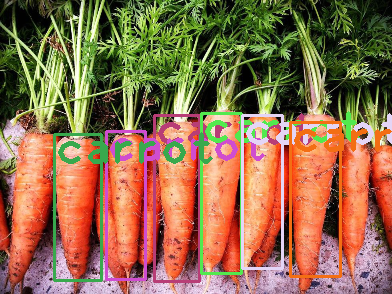

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

net = cv2.dnn.readNet("/gdrive/MyDrive/customYolo/yolov4.cfg", "/gdrive/MyDrive/customYolo/yolov4_15000.weights")
#net = cv2.dnn.readNet("E:/YOLOv4/darknet/cfg/testcfg/yolov4.cfg", "E:/YOLOv4/darknet/cfg/yolov4.weights")
classes = []
with open("/gdrive/MyDrive/customYolo/data/obj.names" , "r") as f:
#with open("E:/YOLOv4/darknet/build/darknet/x64/data/obj.names" , "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in  net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(500,3))

#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/garlic_test8.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/cabbage_test4.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/cucumber_test5.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/carrot_test9.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/leek_test8.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/onion_test6.jpg")
#img = cv2.imread("/gdrive/MyDrive/customYolo/data/test/mushroom_test6.jpg")

img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.6, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
labels = []
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        labels.append(label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

#print(len(labels))
labels_set = set(labels)
labels = list(labels_set)
print(labels)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()